# **Spaceship Titanic Passenger Destiny**
## **Table of Contents**

  * [Data Set Information: Spaceship Titanic Data Set](#Information)<br></br>
  * [Load & Explore the Spaceship Titanic dataset](#Dataset)<br></br>
  * [Data Preprocessing and Visualization](#Preprocessing)<br></br>
  * [Model Development & Evaluation](#Model)<br></br>
  * [Prediction](#Prediction)<br></br>
    


### **Import Libraries & Primary modules**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## **Dataset Information: Spaceship Titanic Data Set**<a name="DatasetInformation"></a>

Spaceship Titanic was enroute with about 13,000 passengers from three different points of origin, Earth, Europa and Mars. The three different destinations recorded for this voyage were as follows:<br>
TRAPPIST-1 e around forty light-years away; 55 Cancri e, also known as Janssen, orbits a star called Copernicus only 41 light years away; And finally the farthest, PSO J318.5-22, afree-Floating Exoplanet Found 80 Light-Years from Earth.<br>
On its maiden voyage, on course of this ill-fated journey, the Spaceship Titanic collided with a spacetime anomaly. The aim of this project is to predict whether a passenger travelling on this spaceship was transported to an alternate dimension or not from the data of ~8700 passengers of known fate. The fate of the rest of one-third is still a mystery. Using machine learning algorithms this project tries to predict what really happened to those passengers whose fate was still buried from historical records. <br>

**File and Data Field Descriptions**<br>
1. Passenger with known fate: Personal records for about two-thirds (~8700) of the passengers, to be used as training data
  
    * PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    * CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * Destination - The planet the passenger will be debarking to.
    * Age - The age of the passenger.
    * VIP - Whether the passenger has paid for special VIP service during the voyage.
    * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * Name - The first and last names of the passenger.
    * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    
2. Passengers with unknown fate: Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. The task is to predict the value of Transported for the passengers in this set.

Transported - The target. For each passenger, predict either True or False.

## **Load & Explore the Spaceship Titanic datasets**<a name = "Dataset"></a>

In [2]:
df = pd.read_csv('../input/spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
print(df.shape)
print(df_test.shape)

(8693, 14)
(4277, 13)


In [5]:
df.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

(None, None)

## **Data Preprocessing and Visualization**<a name = 'Preprocessing'></a>
### **Missing data cleaning**

In [6]:
df.isnull().sum(), df_test.isnull().sum()

(PassengerId       0
 HomePlanet      201
 CryoSleep       217
 Cabin           199
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet       87
 CryoSleep        93
 Cabin           100
 Destination      92
 Age              91
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

The missing values can be easily spotted through sns.heatmap

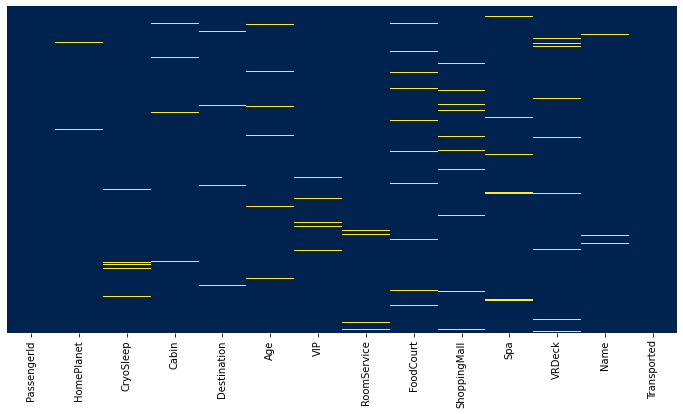

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'cividis');

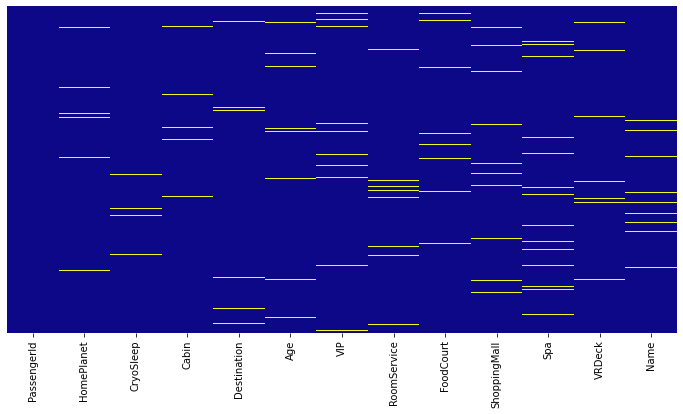

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap = 'plasma');

#### **Handling Cabin Column**
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard. The missing values are replaced by a new value 'X/0/x'. The filled 'Cabin column is then split into 'deck', 'num' and 'side'.

In [9]:
df['Cabin']= df['Cabin'].fillna(value = 'X/0.0/x')
df_test['Cabin']= df_test['Cabin'].fillna(value = 'X/0.0/x')
df[['deck', 'num', 'side']]= df['Cabin'].str.split('/', expand = True)
df_test[['deck', 'num', 'side']]= df_test['Cabin'].str.split('/', expand = True)

#### **Filling up age column:** 
It seems better to fill the age column with the mean age per VIP class. Use the average age values based on VIP for Age.

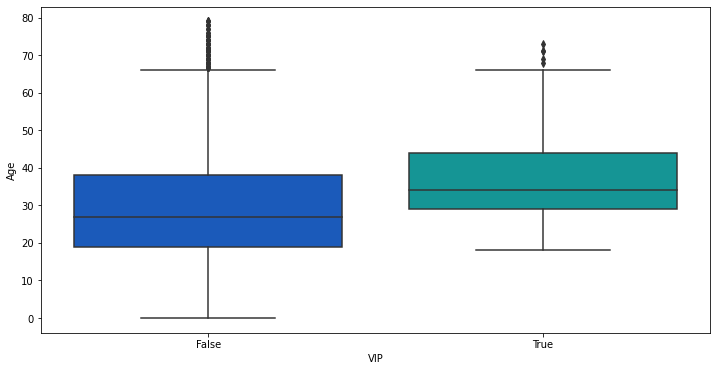

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='VIP',y='Age',data=df,palette='winter');

In [11]:
df.groupby('VIP').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
VIP,,,,,,,
False,28.639611,217.218527,426.336536,173.876298,301.711045,282.718056,0.506332
True,37.449495,473.615385,1811.393782,247.726804,760.710660,1234.856410,0.381910


In [12]:
df_test.groupby('VIP').mean()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,,
False,28.487447,215.763334,405.711610,174.269240,274.936207,291.327467
True,34.534247,519.905405,1747.378378,343.611111,1403.833333,1131.239437


In [13]:
df['Age'].mean()

28.82793046746535

For Train set the mean age of VIP paasengers are found to be 38 and in test set it is 35. So define different functions for both train and test set. The mean age of all passengers and also those in non -VIP list is found to be 29. So define function accordingly. 

In [14]:
def impute_age(cols):
    Age = cols[0]
    VIP = cols[1]   
    if pd.isnull(Age):
        if VIP == True:
            return 38
        elif VIP == False:
            return 29
        else:
            return 29
    else:
        return Age

In [15]:
def impute_age_test(cols): 
    Age = cols[0]
    VIP = cols[1]
    if pd.isnull(Age):
        if VIP == True:
            return 35
        elif VIP == False:
            return 29
        else:
            return 29
    else:
        return Age

In [16]:
#Now apply those function!
df['Age'] = df[['Age','VIP']].apply(impute_age,axis=1)
print(df['Age'].isnull().sum())
df_test['Age'] = df_test[['Age','VIP']].apply(impute_age_test,axis=1)
print(df_test['Age'].isnull().sum())

0
0


The missing categorical values are filled as 'Unknown' and numerical values as 0, except for the age.

In [17]:
df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].fillna('Unknown')
df = df.fillna(0.0)
df_test[df_test.select_dtypes(include=['object']).columns] = df_test[df_test.select_dtypes(include=['object']).columns].fillna('Unknown')
df_test = df_test.fillna(0.0)

In [18]:
df.isnull().values.any()

False

In [19]:
df_test.isnull().values.any()

False

### **Converting Categorical Features**

Encoders require their input to be uniformly strings or numbers. 'CryoSleep' and'VIP' columns contain Boolean values. Convert them to string data type before going in for encoding. 

In [20]:
convert_dict = {'CryoSleep': str,'VIP': str}
df = df.astype(convert_dict)
df_test = df_test.astype(convert_dict)

In [21]:
X = df.drop(["PassengerId", "Cabin", "Transported"], axis = 1)
y = df["Transported"]
titanic_test = df_test.drop(["PassengerId", "Cabin"], axis = 1)

print(X.shape)
print(y.shape)
print (titanic_test.shape)

(8693, 14)
(8693,)
(4277, 14)


OrdinalEncoder from scikit learn, which allows multi-column encoding can be used to convert categorical features in numerical data type.

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X[X.select_dtypes(include=['object']).columns] = enc.fit_transform(X[X.select_dtypes(include=['object']).columns])
titanic_test[titanic_test.select_dtypes(include=['object']).columns] = enc.fit_transform(titanic_test[titanic_test.select_dtypes(include=['object']).columns])

In [23]:
X.info(), titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8693 non-null   float64
 11  deck          8693 non-null   float64
 12  num           8693 non-null   float64
 13  side          8693 non-null   float64
dtypes: float64(14)
memory usage: 950.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------ 

(None, None)

### **Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6085, 14) (6085,)
Test set: (2608, 14) (2608,)


### **Standardize the Variables**

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
titanic_test = scaler.transform(titanic_test)

## **Model Development** <a name = 'Model'></a>
The following algorithms can be used:

* K Nearest Neighbor(KNN)
* Random Forest Classifier
* Support Vector Machine - Linear Kernel
* Support Vector Machine - rbf Kernel
* XGBoost Classifier
* Gradient Boosting Classifier
* Artificial Neural Network

### **Import the required packages**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import accuracy_score

In [27]:
Models=[("KNN",KNeighborsClassifier(n_neighbors=7, weights= 'uniform')),
        ("Random Forest",RandomForestClassifier(n_estimators = 100, criterion = "entropy", max_depth= 13, random_state = 0)),
        ("Random Forest",RandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth= 15, random_state = 0)),
        ("SVM_Linear",svm.SVC(kernel='linear')),
        ("SVM_rbf",svm.SVC(kernel='rbf')),
        ("XGB", XGBClassifier(booster = 'dart', learning_rate=0.05, n_estimators=50, objective='binary:logistic',  use_label_encoder=False,  disable_default_eval_metric = True)), 
        ("XGB", XGBClassifier(booster= 'gbtree', learning_rate=0.05, n_estimators=100, objective='binary:logistic',  use_label_encoder=False,  disable_default_eval_metric = True)),
        ("Gradient Boosting", GradientBoostingClassifier(criterion = 'friedman_mse', max_depth = 2, n_estimators= 500))]

Model_output=[]
for name,model in Models:
    yhat=model.fit(X_train, y_train).predict(X_test)
    Train_set_Accuracy = accuracy_score(y_train, model.predict(X_train))
    F1_score = f1_score(y_test, yhat, average='weighted')
    Accuracy = accuracy_score(y_test, yhat)
    Model_output.append((name, Train_set_Accuracy, Accuracy, F1_score))
    final_Report=pd.DataFrame(Model_output, columns=['Algorithm','Train_set_Accuracy', 'Accuracy','F1-score'])
        
Parameter= [("k", 7),("criterion_entropy"), ("criterion_gini"),("Linear"),("RBF"), ("dart"), ("gbtree"),('criterion_friedman_mse')]
final_Report['Parameter'] = Parameter
final_Report = final_Report[['Algorithm','Parameter', 'Train_set_Accuracy', 'Accuracy','F1-score']]
final_Report

,Algorithm,Parameter,Train_set_Accuracy,Accuracy,F1-score
0,KNN,"(k, 7)",0.822843,0.784893,0.784857
1,Random Forest,criterion_entropy,0.920460,0.815184,0.815168
2,Random Forest,criterion_gini,0.964174,0.817101,0.817102
3,SVM_Linear,Linear,0.786524,0.801380,0.800420
4,SVM_rbf,RBF,0.811832,0.803681,0.803638
5,XGB,dart,0.835497,0.808666,0.808558
6,XGB,gbtree,0.848644,0.812500,0.812277
7,Gradient Boosting,criterion_friedman_mse,0.834840,0.806365,0.806155


### **Support Vector Machine - Radial Basis Function (RBF) Kernel**

Train set Accuracy:  0.8118323746918652
Accuracy of Support Vector Classifier (SVC) calculated manually is  0.8 %
Accuracy of Support Vector Classifier (SVC) is 0.80 % 

 
 Confusion Matrix of Support Vector Classifier (SVC):
 [[1026  273]
 [ 239 1070]]

 
 Classification Report for Support Vector Classifier (SVC):
               precision    recall  f1-score   support

       False       0.81      0.79      0.80      1299
        True       0.80      0.82      0.81      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



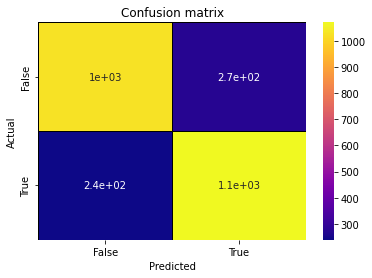

In [28]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train) 
y_pred = svm_rbf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Train set Accuracy: ", accuracy_score(y_train, svm_rbf.predict(X_train)))
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Support Vector Classifier (SVC) calculated manually is ', accuracy.round(2), '%')
print('Accuracy of Support Vector Classifier (SVC) is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of Support Vector Classifier (SVC):' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Support Vector Classifier (SVC):' '\n',classification_report(y_test, y_pred))
plt.figure()
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap = 'plasma',  linecolor='black', linewidths=1)
plt.xlabel("Predicted")
plt.ylabel("Actual");
plt.xticks(np.arange(0.5, 2.5), ['False', 'True'])
plt.yticks(np.arange(0.5, 2.5), ['False', 'True']);

### **XGBoost Classifier with gbtree booster**

Train set Accuracy:  0.8486442070665571
Accuracy of XGBoost Classifier calculated manually is  0.81
Accuracy of XGBoost Classifier is  0.8125

 
 Confusion Matrix of XGBoost Classifier:
 [[1012  287]
 [ 202 1107]]

 
 Classification Report for XGBoost Classifier:
               precision    recall  f1-score   support

       False       0.83      0.78      0.81      1299
        True       0.79      0.85      0.82      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



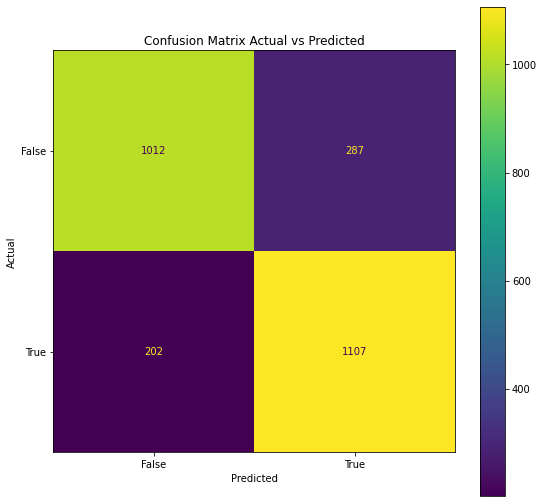

In [29]:
from xgboost import XGBClassifier
XGB = XGBClassifier(booster= 'gbtree', learning_rate=0.05, n_estimators=100, objective='binary:logistic', 
                          use_label_encoder=False,  disable_default_eval_metric = True)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, XGB.predict(X_train)))
accuracy = (y_pred_XGB == y_test).sum() / len(y_test)
print('Accuracy of XGBoost Classifier calculated manually is ', accuracy.round(2))
print('Accuracy of XGBoost Classifier is ', accuracy_score(y_test, y_pred_XGB))
print('\n', '\n','Confusion Matrix of XGBoost Classifier:' '\n', confusion_matrix(y_test, y_pred_XGB))
print('\n', '\n','Classification Report for XGBoost Classifier:' '\n',classification_report(y_test, y_pred_XGB))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_XGB)
cmd = ConfusionMatrixDisplay(cm, display_labels=['False', 'True'])
fig, ax = plt.subplots(figsize=(9,9))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix Actual vs Predicted');

### **Artificial Neural Network**

In [30]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()
# input layer
model.add(Dense(70,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          verbose = 0,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

2022-05-09 12:01:22.242630: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-09 12:01:22.393660: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


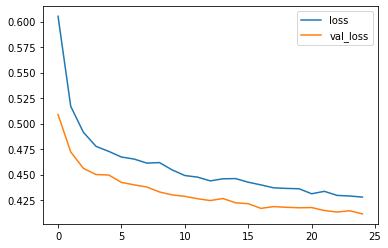

In [31]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [32]:
predictions = model.predict(X_test) > 0.5
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of the ANN Model is ', accuracy_score(y_test,predictions))
print('\n', '\n','Confusion Matrix of ANN Model:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report for ANN Model:' '\n',classification_report(y_test,predictions))

Accuracy of the ANN Model is  0.8163343558282209

 
 Confusion Matrix of ANN Model:
 [[1033  266]
 [ 213 1096]]

 
 Classification Report for ANN Model:
               precision    recall  f1-score   support

       False       0.83      0.80      0.81      1299
        True       0.80      0.84      0.82      1309

    accuracy                           0.82      2608
   macro avg       0.82      0.82      0.82      2608
weighted avg       0.82      0.82      0.82      2608



## **Final Prediction**<a name = 'Prediction'></a>

In [33]:
# Prediction using ANN Classifier
predictions = (model.predict(titanic_test) > 0.5)
submission_preds = predictions.reshape(len(df_test),)
test_ids = df_test['PassengerId']
df = pd.DataFrame({'PassengerId': test_ids.values, 'Transported': submission_preds})
df.to_csv('submission.csv', index = False)

In [34]:
submission_preds

array([ True, False,  True, ...,  True,  True,  True])